## Observations and Insights 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
#mice_number = len(combined_df)
#print(f"There are {mice_number} mice")

mice_number = combined_df["Mouse ID"].nunique()
mice_number

249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_data


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_combined_df = combined_df.drop_duplicates(subset=['Mouse ID'])
#cleaned_combined_df
cleaned_combined_df = combined_df.loc[combined_df['Mouse ID'].isin(duplicate_data)==False]
cleaned_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_num = cleaned_combined_df['Mouse ID'].nunique()
print(f"There are {cleaned_mice_num} mice")

There are 248 mice


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_mean = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_variance = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_sd = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stat_table = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance": drug_variance, "STD": drug_sd, "SEM": drug_sem})
summary_stat_table

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

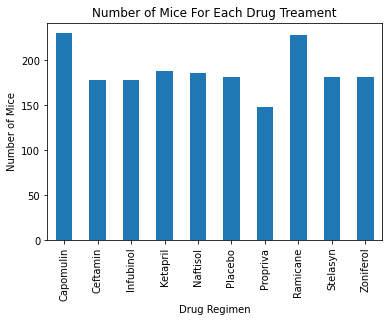

In [45]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

treatment_count = cleaned_combined_df.groupby("Drug Regimen")["Mouse ID"].count()

plt.title("Number of Mice For Each Drug Treament")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

pplot = treatment_count.plot.bar()

In [56]:
treatment_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<BarContainer object of 10 artists>

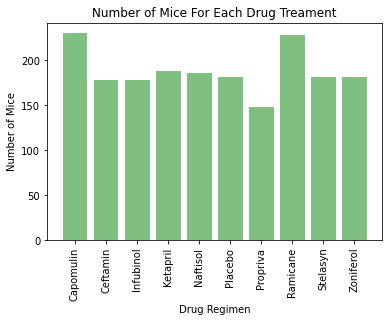

In [57]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(treatment_count))
y_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, y_axis, rotation = 'vertical')

plt.title("Number of Mice For Each Drug Treament")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.bar(x_axis, treatment_count, color='g', alpha=0.5, align="center")

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = cleaned_combined_df.groupby(["Sex"]).count()
gender_df


,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [60]:
female_count = gender_df.loc["Female", "Mouse ID"].sum()
female_count


922

In [61]:
male_count = gender_df.loc["Male", "Mouse ID"].sum()


In [62]:
total_count = female_count+male_count


In [69]:
female_percentage = (female_count/total_count)*100


In [66]:
male_percentage = (male_count/total_count)*100


In [77]:
mouse_percentage_df = pd.DataFrame({"Female/Male": [female_percentage, male_percentage]})
mouse_percentage_df

,Female/Male
0,49.042553
1,50.957447


<AxesSubplot:ylabel='Female/Male'>

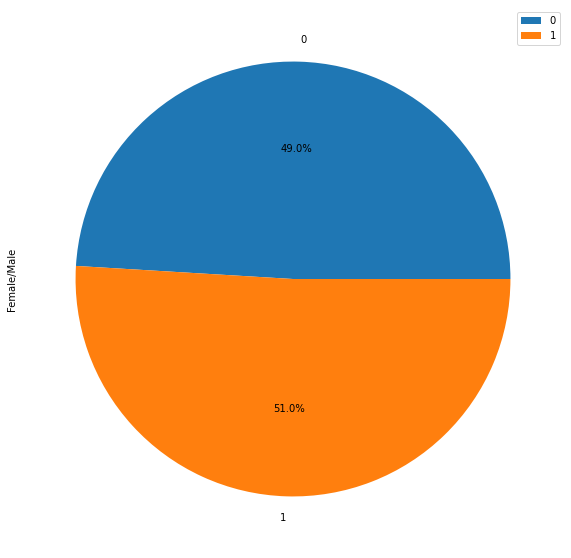

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#gender = ["Male", "Female"]
#figures = ["50.957447", "49.042553"]

pie_plot = mouse_percentage_df.plot.pie(y="Female/Male", figsize=(15,10), autopct="%1.1f%%")
pie_plot


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
